In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

vem_palette = ['#2772b3', '#9fcae0', '#a7daa2', '#11873b']

In [2]:
df_vax = pd.read_csv('ca_vaccine_zip_code.csv')
df_vax = df_vax[df_vax['Vaccine Equity Metric Quartile'].notna()].reset_index(drop=True)
df_vax['Vaccine Equity Metric Quartile'] = df_vax['Vaccine Equity Metric Quartile'].convert_dtypes()

In [3]:
df_plot = df_vax.copy()
df_plot['Percent of Population with 1+ Dose'] = (
    df_plot['Percent of Population with 1+ Dose'] * 100
)

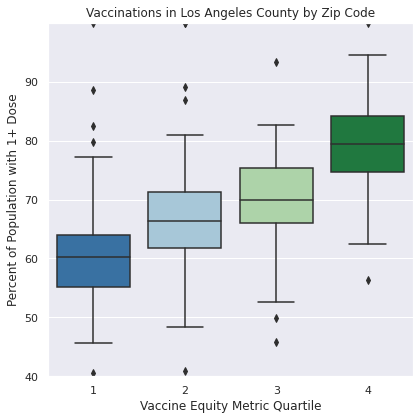

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_ylim(40, 100)
ax.set_yticks(np.arange(40, 100, 10))

sns.boxplot(x='Vaccine Equity Metric Quartile',
            y='Percent of Population with 1+ Dose',
            palette=vem_palette,
            data=df_plot[df_plot['County']=='Los Angeles'],
            ax=ax)
ax.set_title('Vaccinations in Los Angeles County by Zip Code')

fig.show()

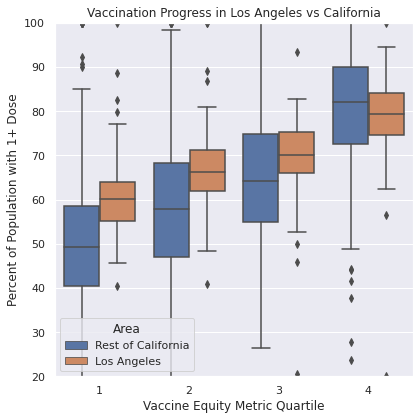

In [5]:
df_plot_2 = df_plot.copy()
df_plot_2['Area'] = df_plot_2['County'].apply(
    lambda x: 'Los Angeles' if x=='Los Angeles' else 'Rest of California'
)

fig, ax = plt.subplots(figsize=(6,6))
ax.set_ylim(20, 100)

sns.boxplot(x='Vaccine Equity Metric Quartile',
            y='Percent of Population with 1+ Dose',
            hue='Area',
            data=df_plot_2,
            ax=ax)
ax.set_title('Vaccination Progress in Los Angeles vs California')

fig.show()